<a href="https://colab.research.google.com/github/21BEC0852/Anju/blob/main/ecg_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
# Import the 'files' object here as well
from google.colab import files

In [13]:
def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification: normal or abnormal

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn_model()
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Saving F10.png to F10.png


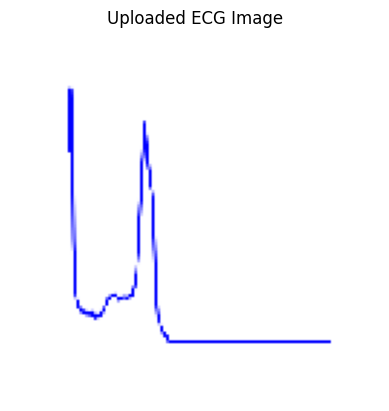

In [20]:
def upload_and_process_image():
    # Now 'files' is accessible within this function
    uploaded = files.upload()
    for filename in uploaded.keys():
        img_path = filename
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize pixel values
        return img_array

img_array = upload_and_process_image()
plt.imshow(img_array[0])
plt.title("Uploaded ECG Image")
plt.axis('off')
plt.show()

In [21]:
# Define the predict_ecg_signal function
def predict_ecg_signal(model, img_array):
    """
    Predicts the class of an ECG signal using the provided CNN model.

    Args:
        model: The trained CNN model.
        img_array: The input image array representing the ECG signal.

    Returns:
        The predicted class (0 or 1).
    """
    prediction = model.predict(img_array)
    # Assuming binary classification, return 1 if prediction > 0.5, else 0
    return 1 if prediction > 0.5 else 0

# Test a single image
result = predict_ecg_signal(cnn_model, img_array)
print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: 0


In [22]:
# If testing multiple images:
# for img in list_of_images:
#     result = predict_ecg_signal(cnn_model, img)
#     print(f"Prediction for image {img}: {result}")
# Upload and predict on a user-uploaded ECG image
uploaded = files.upload()

# Assuming you have a function called 'predict_image' defined somewhere
# to handle image prediction and get labels and scores
# Replace this with your actual implementation
def predict_image(img_name):
    """Placeholder for your image prediction logic."""
    # Implement your logic to predict the label and score using img_name
    label = "Normal"  # Replace with your prediction
    score = 0  # Replace with your prediction score
    return label, score

for img_name in uploaded.keys():
    label, score = predict_image(img_name)
    print(f"Prediction: {label}")
    print(f"Prediction Score: {score:.2f}")

Saving F10.png to F10 (1).png
Prediction: Normal
Prediction Score: 0.00


In [18]:
cnn_model.save('ecg_cnn_model.keras')
# Load the model for future use
# cnn_model = tf.keras.models.load_model('ecg_cnn_model.keras')
